In [1]:
import os

In [2]:
import numpy as np
import cv2

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [4]:
labels = ['fire', 'no_fire']
img_size = 350
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
train = get_training_data('../data/wf_images/train')
test = get_training_data('../data/wf_images/test')
val = get_training_data('../data/wf_images/val')

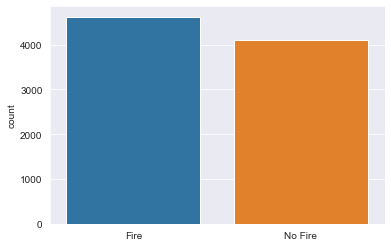

In [6]:
classification_check = []
for i in train:
    if(i[1]==0):
        classification_check.append('Fire')
    else:
        classification_check.append('No Fire')
sns.set_style('darkgrid')
sns.countplot(classification_check)

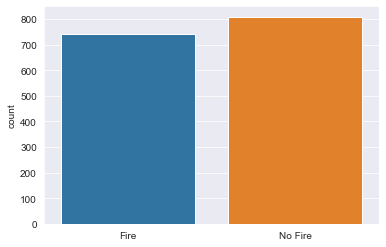

In [8]:
class_check_2 = []
for i in val:
    if(i[1]==0):
        class_check_2.append('Fire')
    else:
        class_check_2.append('No Fire')
sns.set_style('darkgrid')
sns.countplot(class_check_2)

In [9]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

Text(0.5, 1.0, 'no_fire')

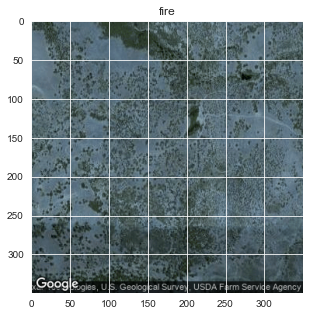

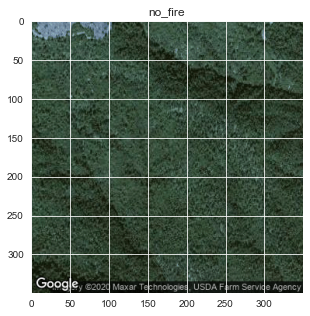

In [16]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [26]:
train.shape

(8736, 2)

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3) , strides =1, padding ='same', activation = 'relu', input_shape = (350,350,1)))
model.add(MaxPool2D((2,2) , strides =2, padding ='same'))
model.add(Conv2D(64, (3,3), strides =1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.1))
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides =1, padding = 'same', activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 350, 350, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 175, 175, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 175, 175, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 175, 175, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 88, 88, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 88, 88, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 44, 44, 64)        0

In [20]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [21]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [24]:
x_train.shape

(26208, 350, 350, 1)

In [25]:
y_train.shape

(8736,)

In [23]:
history = model.fit(x_train, y_train, batch_size = 100, epochs= 12, verbose = 1, validation_data = (x_val, y_val))

ValueError: Data cardinality is ambiguous:
  x sizes: 26208
  y sizes: 8736
Please provide data which shares the same first dimension.